In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from datetime import datetime, timedelta
import seaborn as sns

import datetime
from dateutil.parser import parse

import numpy as np


from matplotlib import rcParams

plt.rcParams["figure.figsize"] = (20,10)
# %reset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
import glob

all_files = glob.glob("./Duo_Auth*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Francisco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df['Timestamp (UTC)'] = pd.to_datetime(df['Timestamp (UTC)'])
df['date'] = df['Timestamp (UTC)'].apply(lambda timestamp: timestamp.date())
df['month'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.month)
df['hour'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.hour)
df['minute'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.minute)
df['second'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.second)

In [5]:
logs = df
print(logs.shape)
logs.head(2)

(7077783, 16)


,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10


In [6]:
users = pd.read_csv('duo_users_clean.csv')
users['Created'] = users['Created'].apply(lambda date: parse(date))
users.head()

,Alias,Status,Created,Last Login,Phone 1 platform,Phone 2 platform,Phone 3 platform,Phone 4 platform,Phone 5 platform,Phone 6 platform,Phone 7 platform,Student,Description,Index
0,user_000001,Active,2017-04-26 18:31:00,4/7/2021 15:00,Landline,NaN,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),1
1,user_000002,Active,2017-04-26 18:58:00,4/6/2021 21:34,Android,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),2
2,user_000003,Active,2017-04-27 20:42:00,4/6/2021 16:35,Landline,Android,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),3
3,user_000004,Active,2017-08-16 17:10:00,4/7/2021 14:23,iOS,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),4
4,user_000005,Active,2017-09-12 22:03:00,4/7/2021 0:17,Android,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),5


In [8]:
# Get a list of users who have logged in that have logged in
usersWhoHaveLoggedIn = logs.Alias.unique()

In [9]:
subsetOfUsers = users[users['Alias'].isin(usersWhoHaveLoggedIn)]
len(subsetOfUsers)

50962

In [12]:
subsetOfUsers['Description'].fillna("", inplace=True)

C:\Users\Francisco\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
subsetOfUsers = subsetOfUsers[~subsetOfUsers["Description"].str.contains("Disabled")]
subsetOfUsers = subsetOfUsers[~subsetOfUsers["Description"].str.contains("DISABLED")]

In [ ]:
# have to run up to list line when starting

In [ ]:
##############################################################################################################################

In [15]:
# Users Created after november
usersCreatedAfterNovember = subsetOfUsers[subsetOfUsers['Created']>'2020-11-01']
usersCreatedAfterNovember.shape

(5536, 14)

In [16]:
usersCreatedAfterNovember.iloc[:5]

,Alias,Status,Created,Last Login,Phone 1 platform,Phone 2 platform,Phone 3 platform,Phone 4 platform,Phone 5 platform,Phone 6 platform,Phone 7 platform,Student,Description,Index
51181,user_051182,Active,2020-11-01 23:10:00,1/1/2021 10:02,iOS,NaN,NaN,NaN,NaN,NaN,NaN,False,Active (Applicant),51182
51182,user_051183,Active,2020-11-02 03:33:00,3/10/2021 4:11,iOS,NaN,NaN,NaN,NaN,NaN,NaN,False,Active (Applicant),51183
51183,user_051184,Active,2020-11-02 04:47:00,4/7/2021 0:29,iOS,NaN,NaN,NaN,NaN,NaN,NaN,False,"Active (Staff, Applicant)",51184
51184,user_051185,Active,2020-11-02 14:34:00,1/21/2021 8:06,iOS,NaN,NaN,NaN,NaN,NaN,NaN,False,Active (Applicant),51185
51185,user_051186,Active,2020-11-02 17:27:00,4/5/2021 4:15,iOS,NaN,NaN,NaN,NaN,NaN,NaN,True,Active (Student),51186


In [ ]:
# usersCreatedAfterNovember.Description.value_counts()

In [32]:
typeOfUsersAfterNovember = usersCreatedAfterNovember.set_index("Alias")["Description"].to_dict()

In [33]:
enrollmentAnlysisLogs = logs[logs['Alias'].isin(typeOfUsersAfterNovember)]

In [34]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Remembered device']

In [35]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Allow unenrolled user']

In [36]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='User is disabled']

In [37]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Bypass user']

In [38]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason'].notna()]

In [39]:
enrollmentAnlysisLogs.set_index('Alias', inplace=True)

In [40]:
enrollmentAnlysisLogs.Reason.value_counts()

User approved       132630
Valid passcode       11135
User cancelled        5591
No response           4536
Invalid passcode      1358
No keys pressed        260
Call timed out         215
User mistake            58
Locked out               4
Name: Reason, dtype: int64

In [41]:
def addToDataFrame(data):
    df_length = len(userEnrollmentLogs)
    userEnrollmentLogs.loc[df_length] = data

In [42]:
usersCreatedAfterNovember.shape

(5536, 14)

In [359]:
enrollmentAnlysisLogs.index.unique().shape

(5390,)

In [ ]:
#########################################################

In [43]:
usersCreatedAfterNovemberWithLogs = enrollmentAnlysisLogs.index.unique()

In [44]:
usersCreatedAfterNovemberWithLogs.shape

(5390,)

In [52]:
userEnrollmentLogs = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10'])
# success and failure data

# users who have authenticated at least 10 times
usersWithTenAuth = []

for user in usersCreatedAfterNovemberWithLogs[:]:
    array = []
    counter = 0
    errorRate = 0
    failures = 0
    if(len(enrollmentAnlysisLogs.loc[user]['Result'])<10):
        continue
    usersWithTenAuth.append(user)
    for i in enrollmentAnlysisLogs.loc[user]['Reason']:
        counter += 1
        array.append(i)
        if(counter==10):
            break
#     print(enrollmentAnlysisLogs.loc[user].Description)
    addToDataFrame(array)

In [53]:
userEnrollmentLogs.shape

(2622, 10)

In [54]:
userEnrollmentLogs.head(10)

,1,2,3,4,5,6,7,8,9,10
0,Valid passcode,Valid passcode,Valid passcode,No response,Invalid passcode,Invalid passcode,Valid passcode,Valid passcode,Valid passcode,Valid passcode
1,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved
2,User approved,User approved,User cancelled,User approved,User approved,User approved,User approved,User approved,No response,User approved
3,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved
4,No response,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved
5,Valid passcode,Valid passcode,Valid passcode,Valid passcode,User approved,User approved,User approved,User approved,User approved,User approved
6,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved
7,User approved,User approved,User approved,User approved,User cancelled,User approved,User approved,User approved,User cancelled,Valid passcode
8,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved
9,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved,User approved


In [55]:
successAndFailureTerms = {
    "User approved": "Success",       
    "Valid passcode": "Success",       
    "User cancelled": "Failure",        
    "No response": "Failure",           
    "Invalid passcode": "Failure",      
    "No keys pressed": "Failure",        
    "Call timed out": "Failure",         
    "User mistake": "Failure",            
    "Locked out": "Failure" 
}

In [66]:
svf = userEnrollmentLogs.replace(successAndFailureTerms)     
svf.shape

(2622, 10)

In [68]:
svf[["1"]].value_counts()[1]

224

In [72]:
failiureAndSuccessTerms = {
    "User approved": "Success",       
    "Valid passcode": "Success",                
    "Invalid passcode": "User Error",      
    "No keys pressed": "User Error",        
    "Call timed out": "User Error",         
    "User mistake": "User Error",            
    "Locked out": "User Error" 
}

In [74]:
enrollmentLogsWithTerms = userEnrollmentLogs.replace(successAndFailureTerms)     
enrollmentLogsWithTerms.shape

(2622, 10)

In [63]:
totalUsers = len(userEnrollmentLogs)
totalUsers

2622

In [95]:
enrollmentLogsWithTerms[[str(i)]].value_counts()

10            
Success           2409
User cancelled     106
No response         70
User Error          37
dtype: int64

In [94]:
arr = []
for i in range(1,11):
        arr.append([enrollmentLogsWithTerms[[str(i)]].value_counts()[0],
                   enrollmentLogsWithTerms[[str(i)]].value_counts()[1],
                   enrollmentLogsWithTerms[[str(i)]].value_counts()[2],
                   enrollmentLogsWithTerms[[str(i)]].value_counts()[3]])
arr

[[2398, 120, 71, 33],
 [2405, 95, 78, 44],
 [2373, 125, 80, 44],
 [2399, 102, 79, 42],
 [2389, 98, 93, 42],
 [2382, 100, 93, 47],
 [2389, 111, 87, 35],
 [2389, 94, 91, 48],
 [2405, 92, 77, 48],
 [2409, 106, 70, 37]]

In [118]:
enrrollmentResults = pd.DataFrame(data=arr, columns=["success","User cancelled","No response","User error"])

In [119]:
enrrollmentResults

,success,User cancelled,No response,User error
0,2398,120,71,33
1,2405,95,78,44
2,2373,125,80,44
3,2399,102,79,42
4,2389,98,93,42
5,2382,100,93,47
6,2389,111,87,35
7,2389,94,91,48
8,2405,92,77,48
9,2409,106,70,37


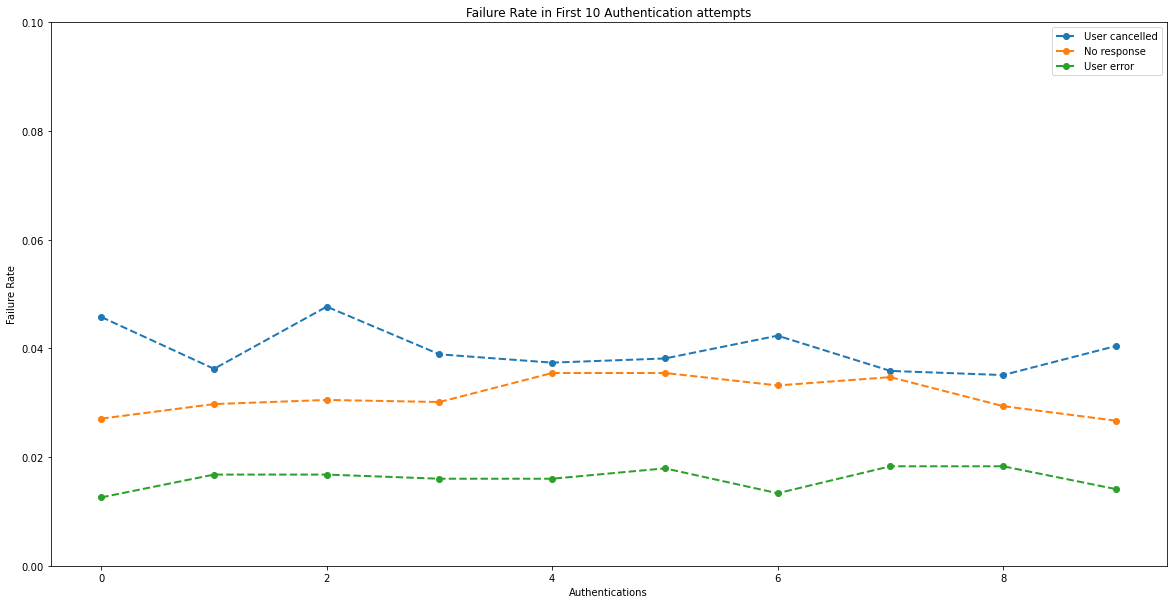

In [120]:
enrrollmentResults.iloc[:,1:].div(totalUsers).plot(ls = 'dashed', lw = 2, marker = 'o')
plt.ylim(0,.1)
plt.title('Failure Rate in First 10 Authentication attempts')
plt.ylabel('Failure Rate')
plt.xlabel('Authentications')
plt.show()
plt.rcParams["figure.figsize"] = (20,10)

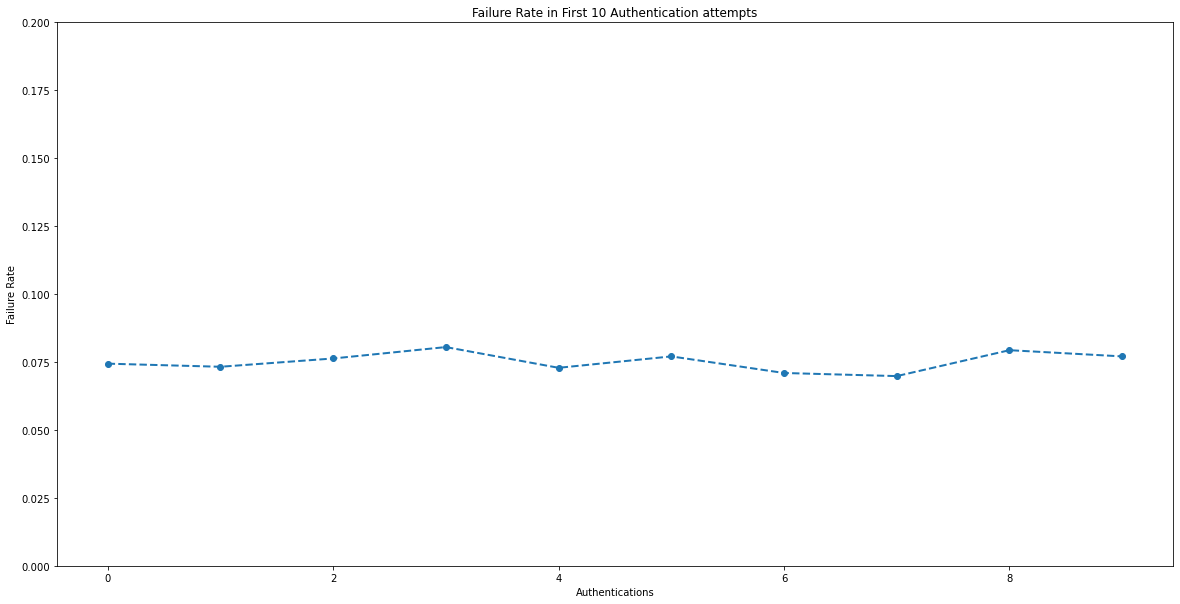

In [70]:
successVsfailureEnrollmentLogs = []
for i in range(1,11):
    value = (userEnrollmentLogs[[str(i)]].value_counts()[1] / totalUsers)
    successVsfailureEnrollmentLogs.append(value)
plt.ylim(0,.2)
plt.title('Failure Rate in First 10 Authentication attempts')
plt.ylabel('Failure Rate')
plt.xlabel('Authentications')
plt.plot(successVsfailureEnrollmentLogs, ls = 'dashed', lw = 2, marker = 'o')
plt.show()
plt.rcParams["figure.figsize"] = (20,10)

In [25]:
# Success Rate by month

In [26]:
users_logs_by_month = logs[logs['month']!=5][["month","Result","Reason"]].groupby(["month","Result"]).count()

In [27]:
users_logs_by_month.head()

Reason
month Result         
1     FAILURE   52240
      FRAUD        17
      SUCCESS  877108
2     FAILURE   47489
      FRAUD        18

In [28]:
ax = users_logs_by_month.unstack(level=1)
ax.columns = ax.columns.droplevel()
ax.drop(columns=['FRAUD'], inplace=True)

In [29]:
ax['success_percent'] = round((ax['SUCCESS'] / (ax['SUCCESS'] + ax['FAILURE'])),2)
ax['failure_percent'] = round((ax['FAILURE'] / (ax['SUCCESS'] + ax['FAILURE'])),2)

In [30]:
ax

Result,FAILURE,SUCCESS,success_percent,failure_percent
month,,,,
1,52240,877108,0.94,0.06
2,47489,1064246,0.96,0.04
3,41964,936941,0.96,0.04
4,46608,1075649,0.96,0.04
11,57298,1058468,0.95,0.05
12,42738,805198,0.95,0.05


In [31]:
new_index = [11,12,1,2,3,4]
ax = ax.reindex(new_index)

In [32]:
ax = ax.rename(index={11: 'November', 12: 'December', 1: 'January', 2: 'February', 3: 'March', 4: 'April'})

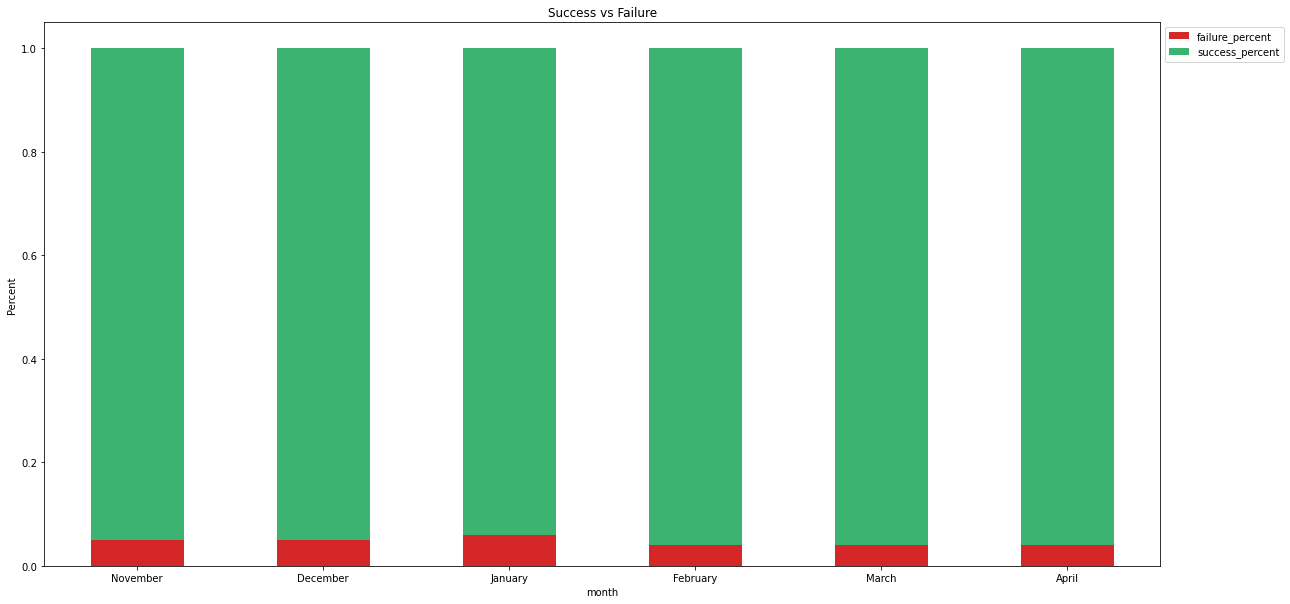

In [33]:
# ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0)
ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0, color=['tab:red','mediumseagreen'])
# ax[['FAILURE','SUCCESS']].plot(rot=0, color=['tab:red','mediumseagreen'])
plt.title('Success vs Failure')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
# Get user failures 

In [45]:
users_logs_by_month = logs[(logs['month']!=5) & (logs['Result']=="FAILURE")][["month","Result","Reason"]]

In [46]:
users_logs_by_month.head()

,month,Result,Reason
10,4,FAILURE,No response
14,4,FAILURE,No response
33,4,FAILURE,User cancelled
68,4,FAILURE,No response
84,4,FAILURE,User cancelled


In [60]:
def label_failure(value):
    if(value=="User cancelled"):
        return "User cancelled"
    elif(value=="No response"):
        return "No response"
    elif(value=="User mistake"):
        return "User mistake"
    elif(value=="User mistake"):
        return "user mistake"
    else:
        return "User Error"

In [61]:
users_logs_by_month['label'] = users_logs_by_month['Reason'].apply(lambda value: label_failure(value))

In [49]:
users_logs_by_month = users_logs_by_month[users_logs_by_month["Reason"]!="Invalid device"]

In [51]:
users_logs_by_month = users_logs_by_month[users_logs_by_month["Reason"]!="User is disabled"]

In [58]:
users_logs_by_month = users_logs_by_month[users_logs_by_month["Reason"]!="Locked out"]

In [59]:
users_logs_by_month.Reason.value_counts()

User cancelled      158489
No response         144498
Invalid passcode     19496
No keys pressed       7167
Call timed out        5359
User mistake          3222
Error                   29
Name: Reason, dtype: int64

In [66]:
users_logs_by_month.head()

,month,Result,Reason,label
10,4,FAILURE,No response,No response
14,4,FAILURE,No response,No response
33,4,FAILURE,User cancelled,User cancelled
68,4,FAILURE,No response,No response
84,4,FAILURE,User cancelled,User cancelled


In [107]:
userLogErrors = users_logs_by_month[['Reason','label','month']].groupby(["month","label"]).count().unstack(level=1)

In [108]:
userLogErrors.columns = userLogErrors.columns.droplevel()

In [109]:
userLogErrors["totalAuthentications"] = logs[['Result','month']].groupby(["month"]).count()

In [110]:
userLogErrors

label,No response,User Error,User cancelled,User mistake,totalAuthentications
month,,,,,
1,27105,5693,27043,522,1077619
2,22626,4819,26529,546,1251683
3,20313,4545,24115,539,1121683
4,23222,5076,26484,574,1283697
11,27837,7191,31365,578,1309930
12,23395,4727,22953,463,1019908


In [115]:
chartOfUsersFailures = userLogErrors.iloc[:,:4].div(userLogErrors.totalAuthentications, axis=0) * 100

In [118]:
chartOfUsersFailures.drop(columns=["User mistake"], inplace=True)

In [119]:
chartOfUsersFailures

label,No response,User Error,User cancelled
month,,,
1,2.515267,0.528294,2.509514
2,1.807646,0.385002,2.119466
3,1.810939,0.405195,2.149894
4,1.808994,0.395420,2.063104
11,2.125075,0.548961,2.394403
12,2.293834,0.463473,2.250497


In [127]:
new_index = [11,12,1,2,3,4]
chartOfUsersFailures = chartOfUsersFailures.reindex(new_index)

In [128]:
chartOfUsersFailures = chartOfUsersFailures.rename(index={11: 'November', 12: 'December', 1: 'January', 2: 'February', 3: 'March', 4: 'April'})

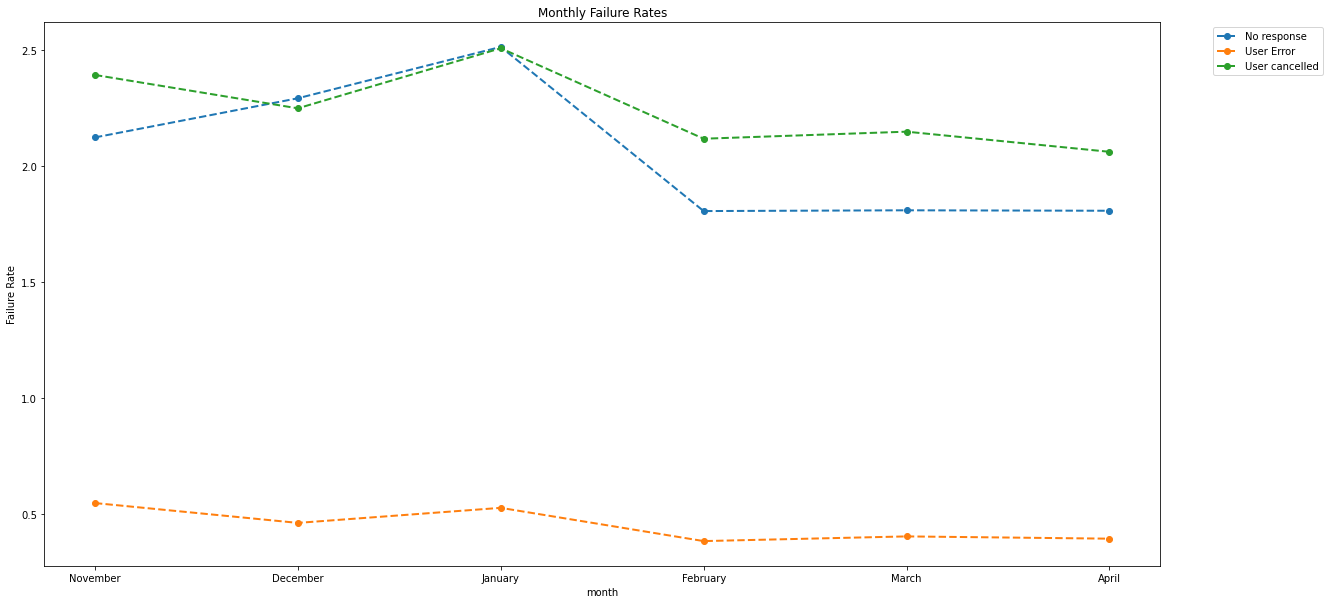

In [148]:
chartOfUsersFailures.plot(ls = 'dashed', lw = 2, marker = 'o')
plt.title('Monthly Failure Rates')
plt.ylabel('Failure Rate')
plt.legend(bbox_to_anchor=(1.15, 1.0))
# plt.cycler('linestyle', ["-","--","-."])
# plt.plot('dates', 'census_people', data=df[df['dates'] < 2004], marker='o', color='green', linewidth=2)

plt.show()

In [36]:
authenticationFailures = logs[logs['Result'] == 'FAILURE']

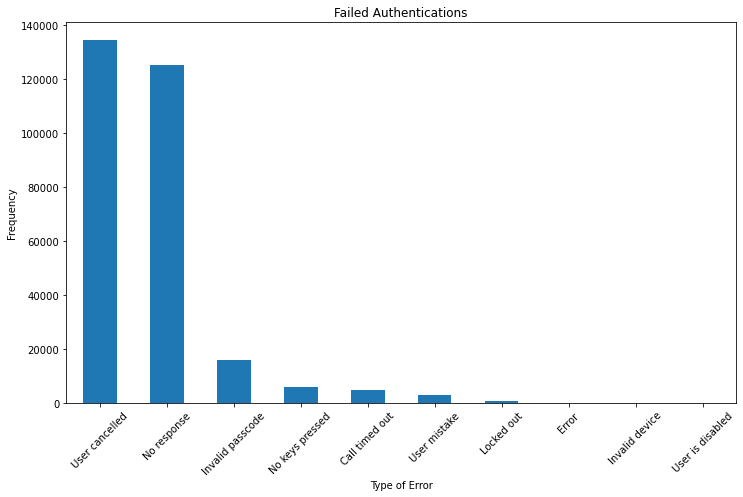

In [443]:
plt.rcParams["figure.figsize"] = (12,7)
authenticationFailures.Reason.value_counts().plot.bar()
plt.xticks(rotation= 45) 
plt.ylabel('Frequency')
plt.xlabel('Type of Error')
plt.title('Failed Authentications')
plt.show()

In [444]:
r = logs[logs['Reason']=='User cancelled']

In [448]:
r.Alias.nunique()

22863

In [449]:
r = logs[logs['Reason']=='No response']

In [450]:
r.Alias.nunique()

26400

In [483]:
userErrorRate = logs[['Alias','Result','Reason']].groupby(['Alias','Result']).size().reset_index(name='counts')

In [484]:
userQuantifiedLogs = userErrorRate.pivot(index='Alias',columns='Result',values='counts').drop(columns=['FRAUD'])

In [485]:
print(userQuantifiedLogs.columns)

Index(['FAILURE', 'SUCCESS'], dtype='object', name='Result')


In [486]:
userQuantifiedLogs.head()

Result,FAILURE,SUCCESS
Alias,,
user_000001,7.0,177.0
user_000002,2.0,498.0
user_000003,31.0,374.0
user_000004,7.0,307.0
user_000005,6.0,448.0


In [487]:
userQuantifiedLogs['FAILURE'] = userQuantifiedLogs['FAILURE'].fillna(0)

In [488]:
userQuantifiedLogs['SUCCESS'] = userQuantifiedLogs['SUCCESS'].fillna(1)

In [489]:
userQuantifiedLogs['errorRate'] = userQuantifiedLogs['FAILURE'] / userQuantifiedLogs['SUCCESS']

In [490]:
userQuantifiedLogs.sort_values(by='errorRate', inplace=True)

In [491]:
userQuantifiedLogs.insert(0,'New_ID', range(1, len(userQuantifiedLogs)+1))

In [492]:
userQuantifiedLogs.head()

Result,New_ID,FAILURE,SUCCESS,errorRate
Alias,,,,
user_045430,1,0.0,45.0,0.0
user_032306,2,0.0,146.0,0.0
user_042524,3,0.0,113.0,0.0
user_032299,4,0.0,95.0,0.0
user_014028,5,0.0,73.0,0.0


In [493]:
userQuantifiedLogs.tail()

Result,New_ID,FAILURE,SUCCESS,errorRate
Alias,,,,
user_042725,35879,11.0,2.0,5.5
user_022473,35880,6.0,1.0,6.0
user_039879,35881,7.0,1.0,7.0
user_042880,35882,9.0,1.0,9.0
user_038190,35883,94.0,5.0,18.8


In [494]:
userQuantifiedLogs['userPercentage'] = userQuantifiedLogs['New_ID'].apply(lambda num: num/len(userQuantifiedLogs))

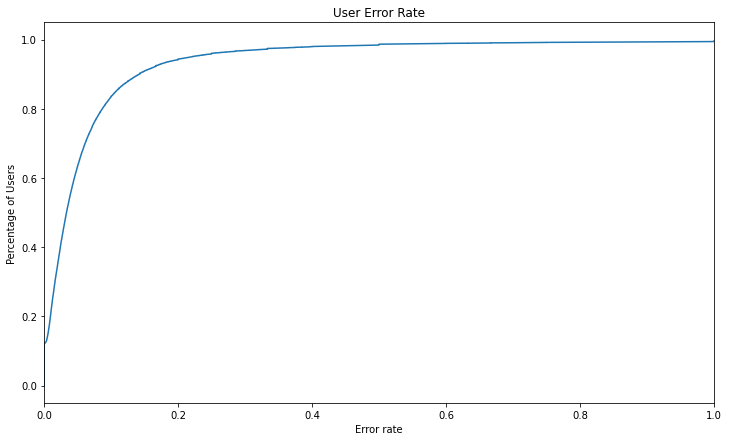

In [495]:
ax = userQuantifiedLogs.plot(x='errorRate', y='userPercentage', legend=False)
plt.ylabel('Percentage of Users')
plt.xlabel('Failure rate')
plt.xlim(0,1)
plt.title('User Failure Rate')
plt.show()

In [496]:
userQuantifiedLogs['errorRate'].describe()

count    35883.000000
mean         0.069894
std          0.201558
min          0.000000
25%          0.012500
50%          0.033333
75%          0.072072
max         18.800000
Name: errorRate, dtype: float64

In [55]:
authenticationFailures = logs[logs['Result'] == 'FAILURE']

In [56]:
factorLogs = logs

In [127]:
factorLogs = factorLogs[['Factor','Result','Reason']].groupby(by=['Factor','Result']).count().reset_index(level=1).pivot(columns="Result")

In [135]:
factorLogs.columns = factorLogs.columns.droplevel()

In [140]:
factorLogs.drop(columns='FRAUD', inplace=True)

In [144]:
factorLogs.fillna(0, inplace=True)

In [149]:
factorLogs['failurePercent'] = (factorLogs['FAILURE'] / (factorLogs['FAILURE'] + factorLogs['SUCCESS']))*100

In [152]:
factorLogs.drop('Bypass Status', inplace=True)

In [157]:
passCodeFailure = factorLogs.loc['Bypass Code']['FAILURE'] + factorLogs.loc['Duo Mobile Passcode']['FAILURE'] + factorLogs.loc['Hardware Token']['FAILURE'] + factorLogs.loc['Passcode']['FAILURE'] + factorLogs.loc['Yubikey Passcode']['FAILURE']

In [158]:
passCodeSucess = factorLogs.loc['Bypass Code']['SUCCESS'] + factorLogs.loc['Duo Mobile Passcode']['SUCCESS'] + factorLogs.loc['Hardware Token']['SUCCESS'] + factorLogs.loc['Passcode']['SUCCESS'] + factorLogs.loc['Yubikey Passcode']['SUCCESS']

In [161]:
factorLogs.loc['passcode'] = [passCodeFailure, passCodeSucess, (passCodeFailure/passCodeSucess)*100]

In [163]:
factorLogs.drop(['Bypass Code','Duo Mobile Passcode','Hardware Token','Passcode'], inplace=True)

In [167]:
factorLogs.drop(['Yubikey Passcode'], inplace=True)

In [173]:
factorLogs[['failurePercent']].sort_values(by='failurePercent', ascending=False)

Result,failurePercent
Factor,
passcode,5.182556
Phone Call,3.864738
Duo Push,2.926649
Remembered Device,0.000000
Security Key (WebAuthn),0.000000
Touch ID (WebAuthn),0.000000
U2F Token,0.000000


In [174]:
factorsBeingUsed = logs.reset_index()[['Factor','Description','Reason','Alias']]
factorsBeingUsed.head()

,Factor,Description,Reason,Alias
0,Phone Call,Active (Student),User approved,user_008576
1,Duo Push,Active (Student),User approved,user_049277
2,Duo Push,Active (Student),User approved,user_025756
3,Duo Push,Active (Student),User approved,user_030286
4,Duo Push,Active (Student),User approved,user_019093


In [187]:
factorUsage = factorsBeingUsed.groupby(['Description','Factor','Alias']).count().unstack(level=2).count(axis=1).reset_index()

In [188]:
def computePercentageOfGroup(row):
    if(row['Description']=='Active (Faculty)'):
        return round((row[0] / 1773) * 100, 1)
    elif(row['Description']=='Active (Staff)'):
        return round((row[0] / 1179) * 100, 1)
    elif(row['Description']=='Active (Student)'):
        return round((row[0] / 32931) * 100, 1)

In [189]:
factorUsage['percentOfPopulation'] = factorUsage.apply(lambda row: computePercentageOfGroup(row), axis=1)

In [211]:
factorUsageResult = factorUsage.set_index(['Description','Factor'])['percentOfPopulation'].unstack(level=1).transpose().fillna(0).sort_values(by='Active (Student)', ascending=False)
factorUsageResult.drop('Passcode', inplace=True)


Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Duo Push,72.3,68.7,87.7
Remembered Device,58.0,68.8,55.2
Phone Call,41.2,45.5,39.1
Duo Mobile Passcode,16.0,11.0,20.8
Touch ID (WebAuthn),0.2,0.2,1.1
Bypass Code,0.5,0.8,0.6
Hardware Token,14.4,28.6,0.6
Bypass Status,0.2,0.0,0.1
Security Key (WebAuthn),2.0,0.9,0.0


In [212]:
factorUsageResult

Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Duo Push,72.3,68.7,87.7
Remembered Device,58.0,68.8,55.2
Phone Call,41.2,45.5,39.1
Duo Mobile Passcode,16.0,11.0,20.8
Touch ID (WebAuthn),0.2,0.2,1.1
Bypass Code,0.5,0.8,0.6
Hardware Token,14.4,28.6,0.6
Bypass Status,0.2,0.0,0.1
Security Key (WebAuthn),2.0,0.9,0.0


In [424]:
factorLogs = logs[['Factor','Result','month']]

In [425]:
factorLogs = factorLogs.groupby(['month','Factor']).count().reset_index(level=1).pivot(columns='Factor',values='Result')

In [426]:
factorLogs.drop(5, inplace=True)

In [427]:
factorLogs.fillna(0, inplace=True)

In [428]:
factorLogs['Passcodes'] = factorLogs['Bypass Code'] + factorLogs['Duo Mobile Passcode'] + factorLogs['Hardware Token'] + factorLogs['Passcode'] + factorLogs['Yubikey Passcode']

In [431]:
factorLogs['Security Key'] = factorLogs['Security Key (WebAuthn)'] + factorLogs['U2F Token']

In [432]:
factorLogs.drop(columns=['Security Key (WebAuthn)','U2F Token'], inplace=True)

In [435]:
factorLogs.drop(columns=['Bypass Status'], inplace=True)

In [429]:
factorLogs.drop(columns=['Bypass Code','Duo Mobile Passcode','Hardware Token','Passcode', 'Yubikey Passcode'], inplace=True)

In [438]:
factorLogs

Factor,Duo Push,Phone Call,Remembered Device,Touch ID (WebAuthn),Passcodes,Security Key
month,,,,,,
1,573462.0,114449.0,163239.0,3065.0,48698.0,2737.0
2,685134.0,131844.0,208977.0,3627.0,55511.0,3305.0
3,605309.0,118483.0,179256.0,3285.0,48629.0,3167.0
4,687033.0,133840.0,220139.0,3700.0,51515.0,3385.0
11,690756.0,122046.0,204621.0,3403.0,65069.0,2713.0
12,527273.0,98426.0,148852.0,2684.0,48765.0,2627.0


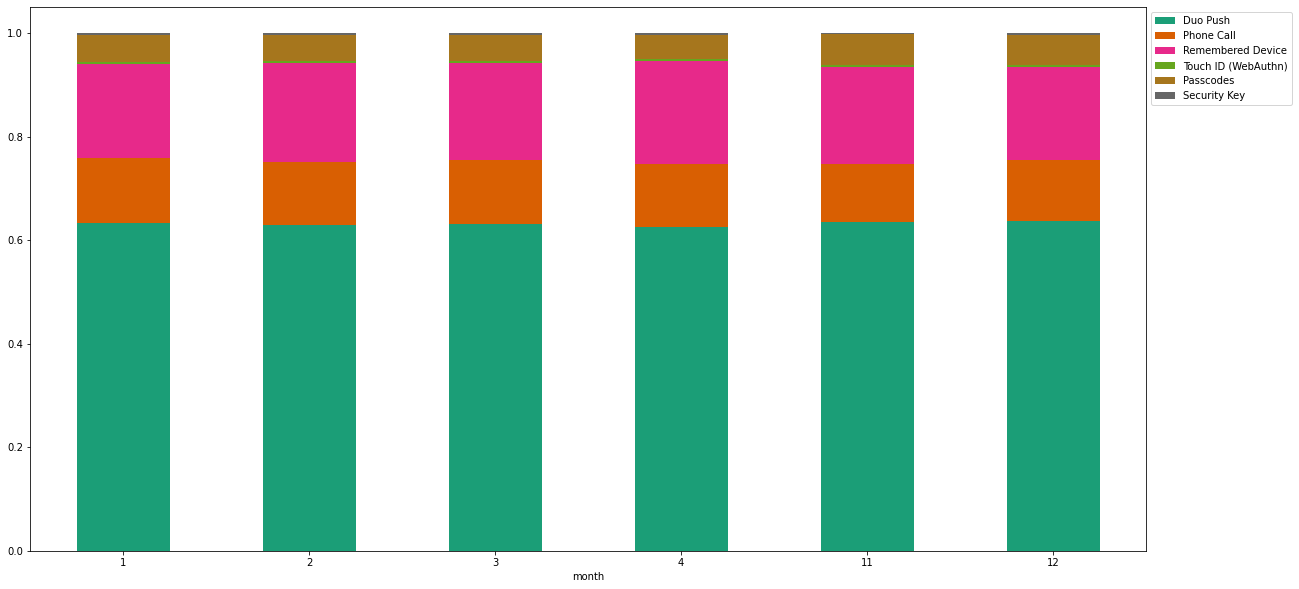

In [442]:
factorLogs.div(factorLogs.sum(axis=1), axis=0).plot.bar(stacked=True, cmap='Dark2', rot=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Recovery

In [149]:
y = pd.read_csv('updatedRT.csv')

In [152]:
y['Description'] = y.user.apply(lambda alias: typeOfUsers[alias])

NameError: name 'typeOfUsers' is not defined

In [151]:
y['recovery_time'] = y['recovery_time'].astype(int)

In [174]:
y['recovery_time_in_minutes'] = y['recovery_time'].apply(lambda seconds: seconds // 60)

In [175]:
def convert(seconds):
    min, sec = divmod(seconds, 60)
    print(min, sec)
    if min != 0:
        return min
    else:
        return sec      

In [176]:
y.head()

,user,recovery_time,Description,recovery_time_in_minutes
0,user_000001,19,Active (Staff),0
1,user_000002,30067,Active (Staff),501
2,user_000003,345,Active (Staff),5
3,user_000004,5,Active (Staff),0
4,user_000005,164,Active (Staff),2


In [177]:
y.sort_values(by='recovery_time', inplace=True)

In [178]:
y.head()

,user,recovery_time,Description,recovery_time_in_minutes
31124,user_046676,0,Active (Student),0
4974,user_007729,0,Active (Student),0
29216,user_044532,0,Active (Student),0
29210,user_044525,0,Active (Student),0
29206,user_044521,0,Active (Student),0


In [179]:
y.insert(0,'New_ID', range(1, len(y)+1))

In [180]:
y['userPercentage'] = y['New_ID'].apply(lambda num: num/len(y))

In [184]:
y['normalized_recovery_time'] = y['recovery_time'] / 11595074

In [185]:
y.head()

,New_ID,user,recovery_time,Description,recovery_time_in_minutes,userPercentage,normalized_recovery_time
31124,1,user_046676,0,Active (Student),0,0.000028,0.0
4974,2,user_007729,0,Active (Student),0,0.000056,0.0
29216,3,user_044532,0,Active (Student),0,0.000084,0.0
29210,4,user_044525,0,Active (Student),0,0.000111,0.0
29206,5,user_044521,0,Active (Student),0,0.000139,0.0


In [190]:
y['recovery_time'].mean()

31246.670763314105

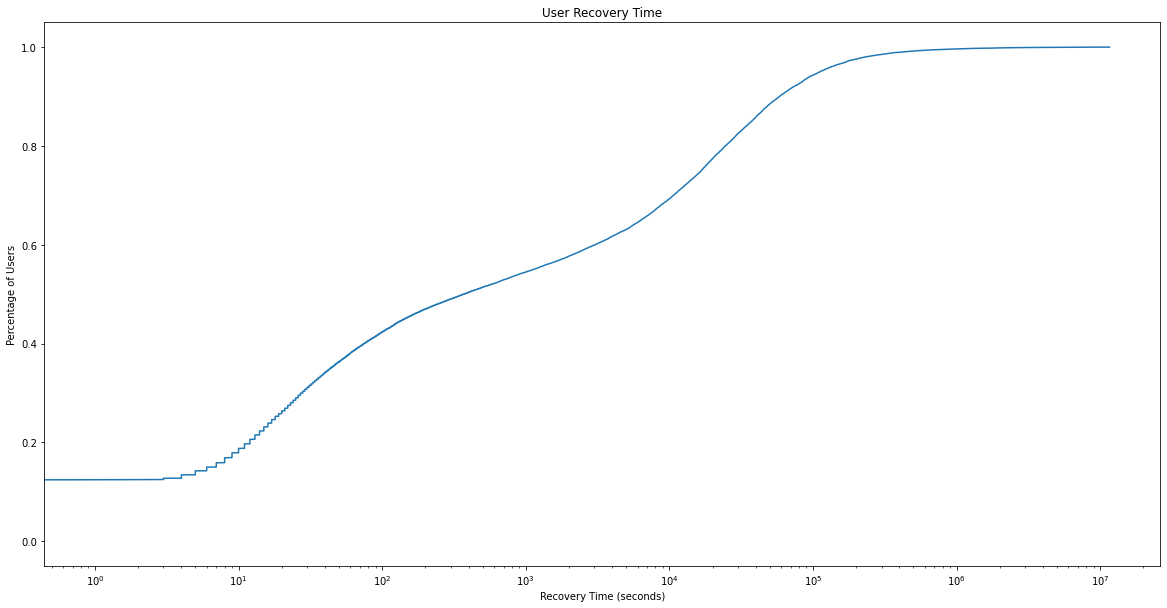

In [394]:
plt.rcParams["figure.figsize"] = (20,10)
ax = y.plot(x='recovery_time', y='userPercentage', legend=False)
plt.ylabel('Percentage of Users')
plt.xlabel('Recovery Time (seconds)')

ax.set_xscale('log')

plt.title('User Recovery Time')
plt.show()

In [409]:
y['recovery_time'].describe().apply(lambda x: format(x, 'f'))

count       35883.000000
mean        31246.670763
std        204293.737039
min             0.000000
25%            18.000000
50%           369.000000
75%         16691.000000
max      11595074.000000
Name: recovery_time, dtype: object